In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'intencity_transformed_image')

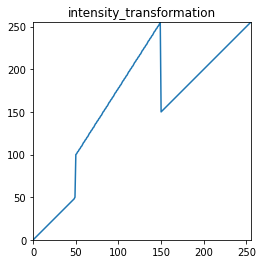

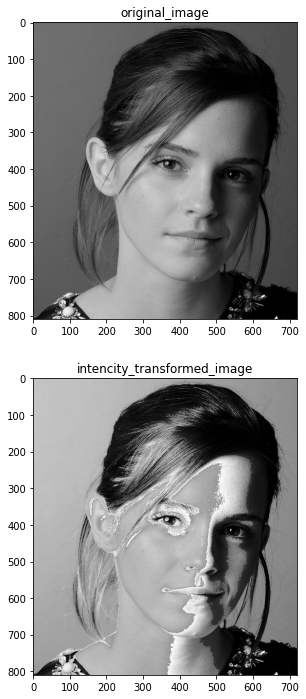

In [33]:
f = cv.imread(r'emma_gray.jpg', cv.IMREAD_GRAYSCALE)

assert f is not None

t1 = np.linspace(0, 50, 50)
t2 = np.linspace(50, 100, 0)
t3 = np.linspace(100, 255, 100)
t4 = np.linspace(255, 150, 0)
t5 = np.linspace(150, 255, 106)

t = np.concatenate((t1, t2, t3, t4, t5), axis = 0).astype(np.uint8)

fg, ax = plt.subplots()
ax.plot(t)

ax.set_title('intensity_transformation')
ax.set_aspect('equal')
plt.xlim([0, 255])
plt.ylim([0, 255])

assert len(t) == 256
g = cv.LUT(f, t)

f = cv.cvtColor(f, cv.COLOR_BGR2RGB)
g = cv.cvtColor(g, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# ax[0].imshow(f, cmap = 'gray', vmin=0, vmax=255)
# ax[1].imshow(g, cmap = 'gray', vmin=0, vmax=255)

ax[0].imshow(f)
ax[0].set_title('original_image')
ax[1].imshow(g)
ax[1].set_title('intencity_transformed_image')


Text(0.5, 1.0, 'white matter')

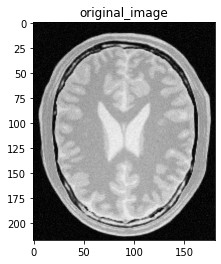

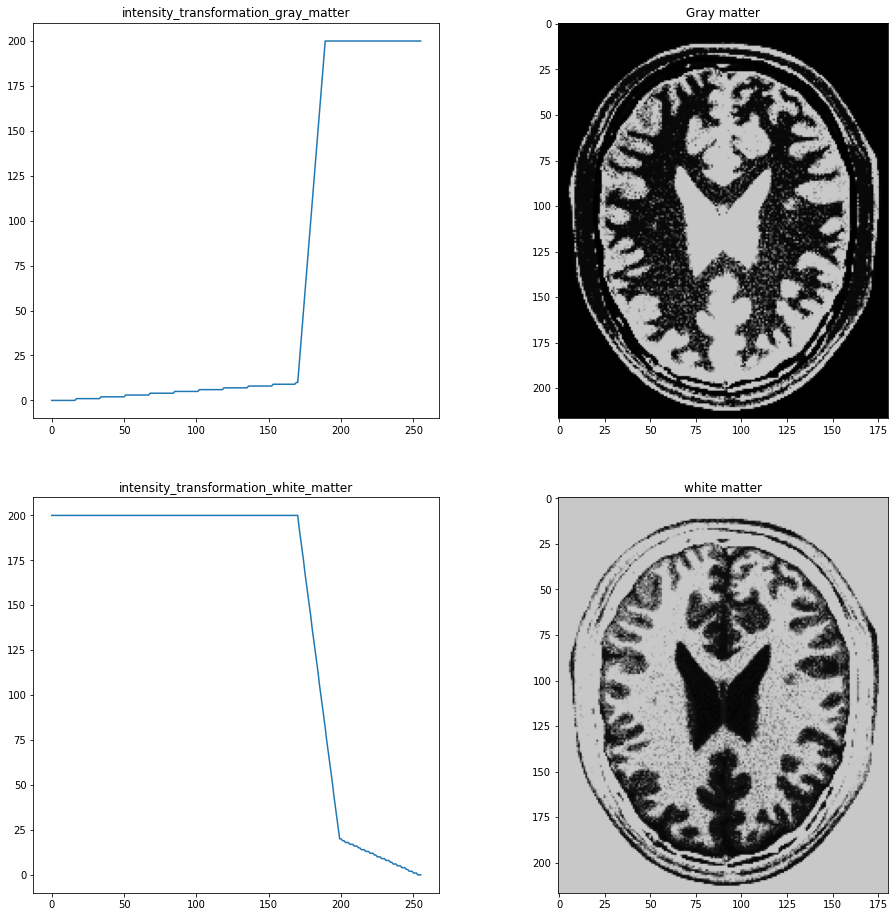

In [26]:
f = cv.imread(r'brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
f = cv.cvtColor(f, cv.COLOR_BGR2RGB)

assert f is not None

t1 = np.linspace(0, 10, 170)
t2 = np.linspace(10, 200, 20)
t3 = np.linspace(200, 200, 66)

t4 = np.linspace(0, 200, 0)
t5 = np.linspace(200, 200, 170)
t6 = np.linspace(200, 20, 30)
t7 = np.linspace(20, 0, 56)

# t4 = np.linspace(0, 50, 80)
# t5 = np.linspace(50, 100, 100)
# t6 = np.linspace(200, 255, 76)


t = np.concatenate((t1, t2, t3), axis = 0).astype(np.uint8)
t_ = np.concatenate((t4, t5, t6, t7), axis = 0).astype(np.uint8)

fg, ax = plt.subplots()

ax.imshow(f)
ax.set_title('original_image')


# ax.set_title('intensity_transformation')                          #RGB colors for gray matter nearly 200, 127, 137
# ax.set_aspect('equal')
# plt.xlim([0, 255])
# plt.ylim([0, 255])

assert len(t) == 256
g = cv.LUT(f, t)
h = cv.LUT(f, t_)


g = cv.cvtColor(g, cv.COLOR_BGR2RGB)
h = cv.cvtColor(h, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(2, 2, figsize=(16, 16))

# ax[0].imshow(f, cmap = 'gray', vmin=0, vmax=255)
# ax[1].imshow(g, cmap = 'gray', vmin=0, vmax=255)

ax[0][0].plot(t)
ax[0][0].set_title('intensity_transformation_gray_matter')

ax[0][1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[0][1].set_title('Gray matter')

ax[1][0].plot(t_)
ax[1][0].set_title('intensity_transformation_white_matter')

ax[1][1].imshow(h, cmap='gray', vmin=0, vmax=255)
ax[1][1].set_title('white matter')




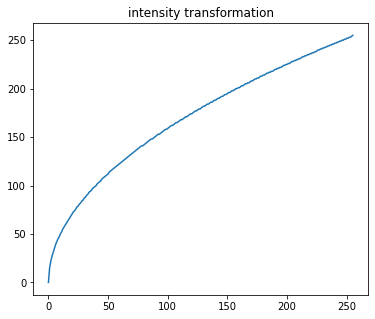

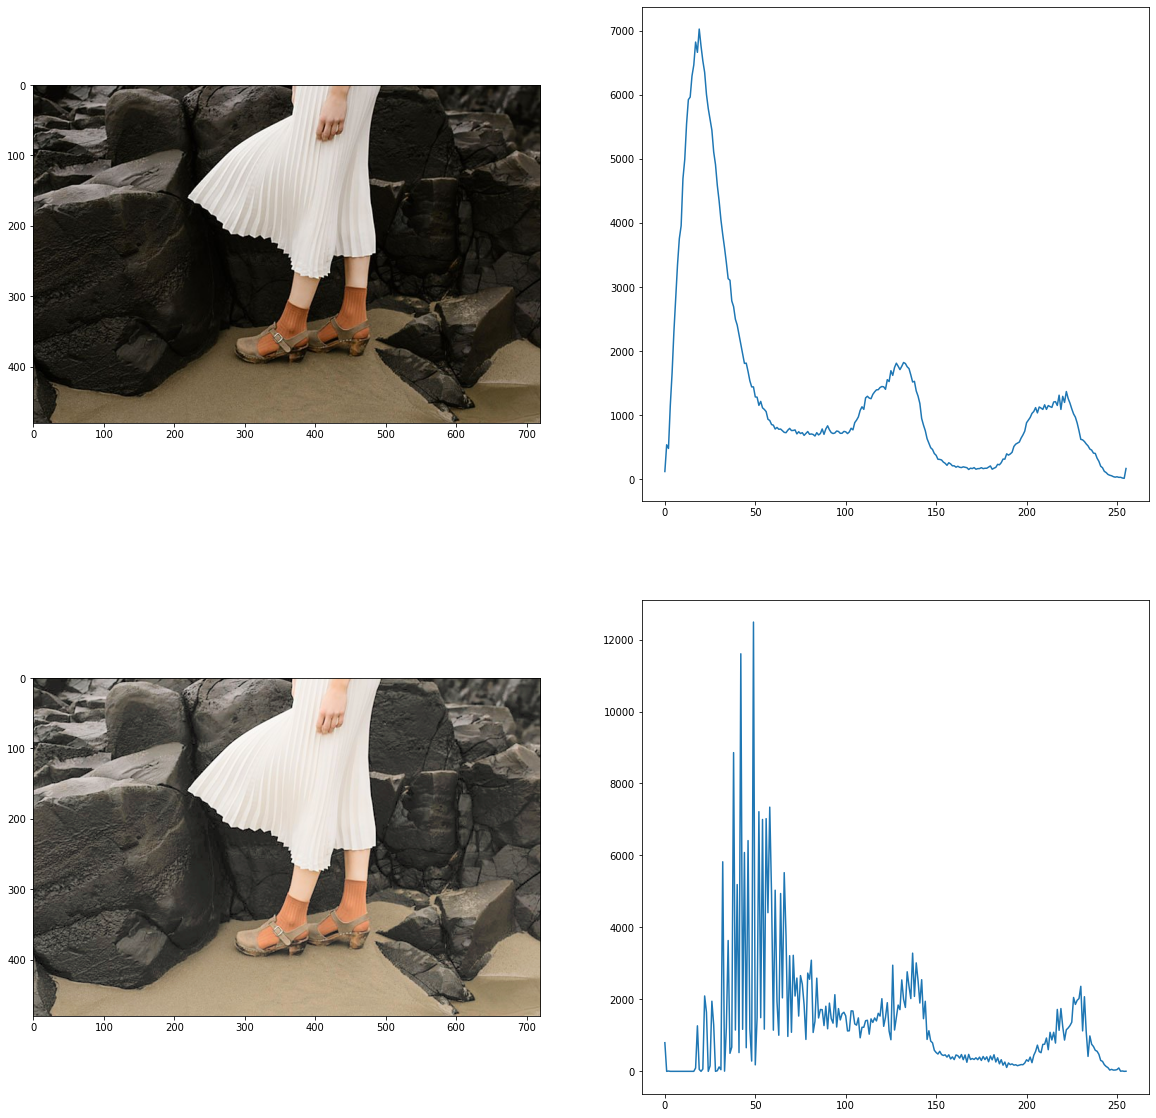

In [8]:
f = cv.imread(r'highlights_and_shadows.jpg')
assert f is not None

f1 = cv.cvtColor(f, cv.COLOR_BGR2RGB)
f2 = cv.cvtColor(f, cv.COLOR_BGR2LAB)

gamma = 0.5
t = np.array([(p/255)**gamma*255 for p in range(0, 256)]).astype(np.uint8)
fig, ax = plt.subplots(figsize=(6, 5))
ax.plot(t)
ax.set_title("intensity transformation")

f3 = cv.LUT(f2[:, :, 0], t)
f2[:,:, 0] = f3    
f4 = cv.cvtColor(f2, cv.COLOR_LAB2RGB)  

hist_f = cv.calcHist([f], [2], None, [256], [0, 256]) #histogram of original image
hist_f4 = cv.calcHist([f4], [2], None, [256], [0, 256]) #histogram of gamma corected image

fig, ax = plt.subplots(2, 2, figsize=(20, 20))

ax[0][0].imshow(f1)
ax[0][1].plot(hist_f)
ax[1][0].imshow(f4)
ax[1][1].plot(hist_f4)

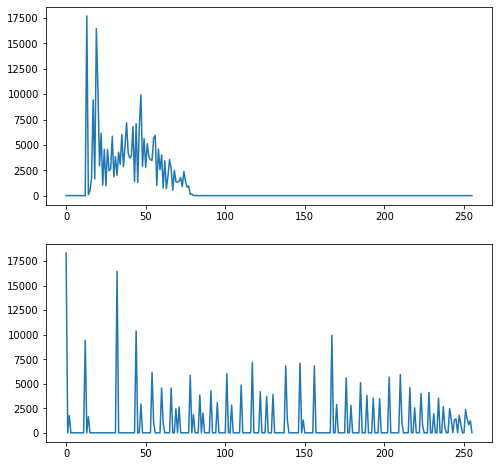

In [15]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread(r"shells.png", cv.IMREAD_GRAYSCALE)
assert img is not None

def my_hist(img):
    hist = np.histogram(img.flatten(),256,[0,256])[0]
    cdf = hist.cumsum()
    cdf = np.ma.masked_equal(cdf,0)
    cdf = (cdf - cdf.min())*255/(cdf.max()-cdf.min())
    cdf = np.ma.filled(cdf,0).astype('uint8')
    img_eq = cv.LUT(img, cdf)
    return img_eq

manual_eq = my_hist(img)

hist_img = cv.calcHist([img], [0], None, [256], [0, 256])
hist_man_img = cv.calcHist([manual_eq], [0], None, [256], [0, 256])

# hist = np.histogram(img)

fg, ax = plt.subplots(2,1, figsize=(8, 8))
ax[0].plot(hist_img)
ax[1].plot(hist_man_img)
    


(300, 480, 3)
(900, 1440, 3)
0


Text(0.5, 1.0, 'zoomed')

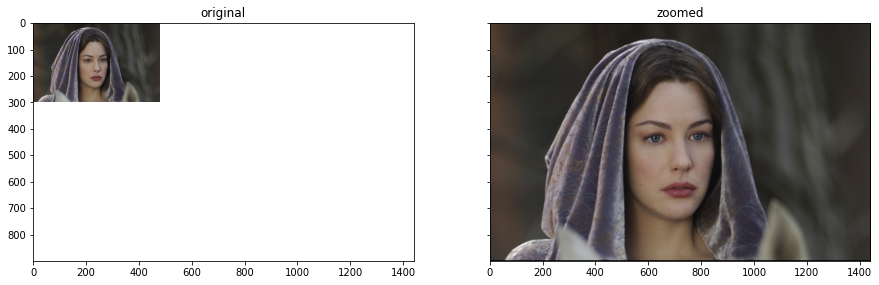

In [29]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math as m

im = cv.imread(r"a1q5images/im02small.png")

assert im is not None
print(im.shape)

s = 3
ssd = 0
zoomed = np.zeros((m.ceil(im.shape[0]*s), m.ceil(im.shape[1]*s), 3), dtype=im.dtype)
print(zoomed.shape)

if (s>=1):
    for row in range(zoomed.shape[0]-m.ceil(s)):
        for col in range(zoomed.shape[1]-m.ceil(s)):
            for p in range(3):
                zoomed[row][col][p] = im[m.floor(row/s)][m.floor(col/s)][p]
else:
    for row in range(zoomed.shape[0]-1):
        for col in range(zoomed.shape[1]-1):
            for p in range(3):
                zoomed[row][col][p] = im[m.floor(row/s)][m.floor(col/s)][p]


# for row in range(im.shape[0]):
#     for col in range(im.shape[1]):
#         ssd+= (im[row][col]-zoomed[row][col])**2
print(ssd)
fig, ax = plt.subplots(1, 2 , figsize=(15, 15), sharex = 'all', sharey = 'all')

ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[0].set_title("original")
ax[1].imshow(cv.cvtColor(zoomed, cv.COLOR_BGR2RGB))
ax[1].set_title("zoomed")
# ax[1].imshow(zoomed, cmap='gray')


(190, 182)


Text(0.5, 1.0, 'sobel_horizontal')

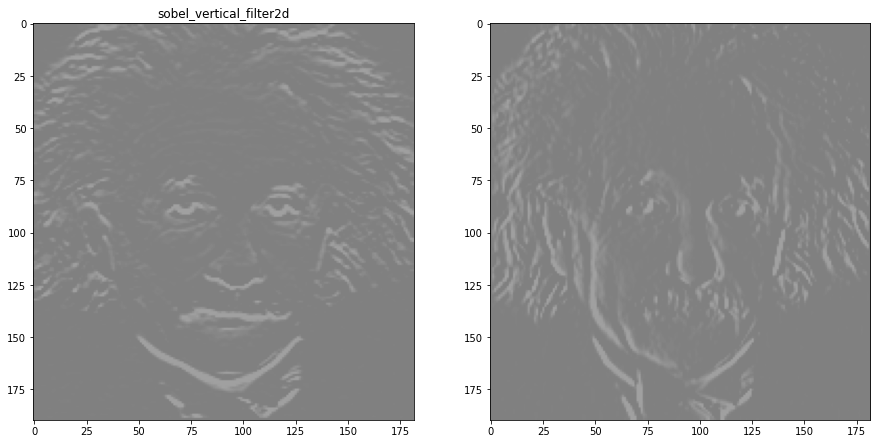

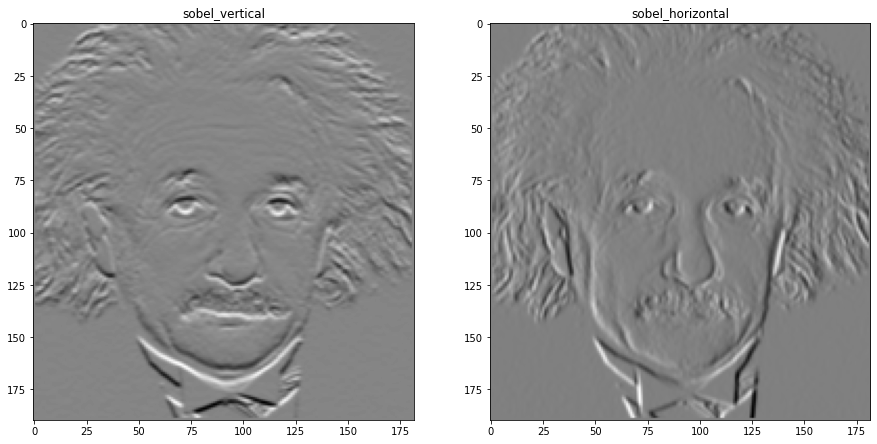

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im = cv.imread(r"einstein.png", cv.IMREAD_REDUCED_GRAYSCALE_2)
# im = cv.cvtColor(im, cv.COLOR_GRAY2BGR)
# im = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
print(im.shape)
assert im is not None

def sobel(im, kernal):
    row, col = im.shape
    filtered_im = np.zeros((im.shape))
    for i in range(0 + 1, row-1):
        for j in range(0 + 1, col-1):
            # im[i-1][j-1]*kernal[0][0]
            # im[i-1][j]*kernal[0][1]
            # im[i-1][j+1]*kernal[0][2]
            av = 0
            for ki in [0, 1, 2]:
                for kj in [0, 1, 2]:
                    av+= im[i - 1 + ki][j - 1 + kj]*kernal[ki][kj]
                    # print(i, j, ki, kj)
            av = av/9
            filtered_im[i][j] = av
    return filtered_im

sobel_v = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_h = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

sobelv_im = cv.filter2D(im, -1, sobel_v)
sobelh_im = cv.filter2D(im, -1, sobel_h)
fig, ax = plt.subplots(1, 2, figsize=(15, 15))

ax[0].imshow(sobelv_im, cmap='gray', vmin=-1020, vmax=1020)
ax[0].set_title("sobel_vertical_filter2d")
ax[1].imshow(sobelh_im, cmap='gray', vmin=-1020, vmax=1020)
# ax[1].set_title("sobel_horizontal_filter2d")
# im = np.array([[1, 2, 3, 4], [1, 8, 3, 4], [1, 2, 3, 4]])

filtered_imv = sobel(im, sobel_v)
filtered_imh = sobel(im, sobel_h)

# filtered_imv = cv.cvtColor(filtered_imv, cv.COLOR_GRAY2RGB)
# filtered_imh = cv.cvtColor(filtered_imh, cv.COLOR_GRAY2RGB)

fig, ax = plt.subplots(1, 2, figsize=(15, 15))

ax[0].imshow(filtered_imv, cmap='gray')
ax[0].set_title("sobel_vertical")
ax[1].imshow(filtered_imh, cmap='gray')
ax[1].set_title("sobel_horizontal")

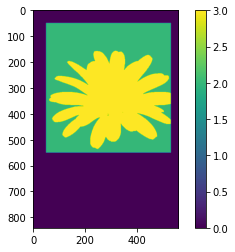

In [27]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im = cv.imread(r"daisy.jpg", cv.IMREAD_COLOR)

mask = np.zeros(im.shape[:2], np.uint8)
rect = (50, 50, 480, 500)

bgdmodel = np.zeros((1, 65), np.float64)
fgdmodel = np.zeros((1, 65), np.float64)

mask, bgModel, fgModel = cv.grabCut(im, mask, rect, bgdmodel, fgdmodel, 5, cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2) | (mask==0), 1, 0).astype('uint8')
img = im*mask2[:,:,np.newaxis]

plt.imshow(mask)
plt.colorbar()
plt.show()

In [34]:
a = np.array([1, 2, 3, 4, 5, 6, 7])
b = np.ma.masked_equal(a, 5)
print(b)

[1 2 3 4 -- 6 7]
